In [29]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv("ScoringTraining.csv") 
scaler = MinMaxScaler()
 
df=pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns, index=data.index) 
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.000000,1.0,0.000015,0.412844,0.020408,2.435759e-06,0.003031,0.224138,0.000000,0.111111,0.0,0.10
1,0.000007,0.0,0.000019,0.366972,0.000000,3.696982e-07,0.000864,0.068966,0.000000,0.000000,0.0,0.05
2,0.000013,0.0,0.000013,0.348624,0.010204,2.581822e-07,0.001011,0.034483,0.010204,0.000000,0.0,0.00
3,0.000020,0.0,0.000005,0.275229,0.000000,1.093528e-07,0.001097,0.086207,0.000000,0.000000,0.0,0.00
4,0.000027,0.0,0.000018,0.449541,0.010204,7.560939e-08,0.021134,0.120690,0.000000,0.018519,0.0,0.00


In [30]:
df['SeriousDlqin2yrs'].value_counts()


0.0    139974
1.0     10026
Name: SeriousDlqin2yrs, dtype: int64

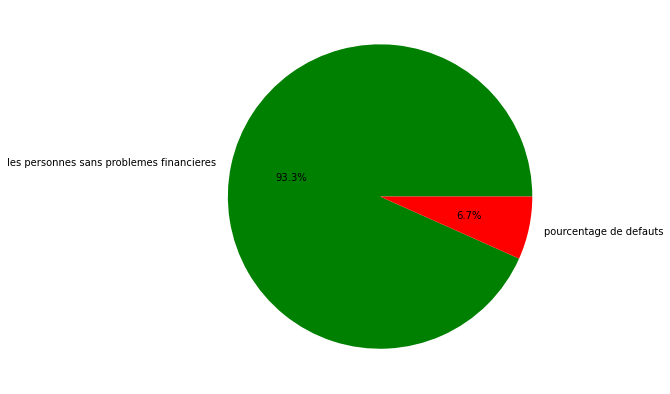

In [31]:
import matplotlib.pyplot as plt
x=['les personnes sans problemes financieres','pourcentage de defauts']
data1=df['SeriousDlqin2yrs'].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.pie(data1, labels = x , colors=['g' , 'r'] , autopct='%1.1f%%')
plt.show()

In [32]:
#number of missing data
missing_data = df.isnull().sum()
missing_data 

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [33]:
print(df.isnull().sum().sum())

33655


<AxesSubplot:>

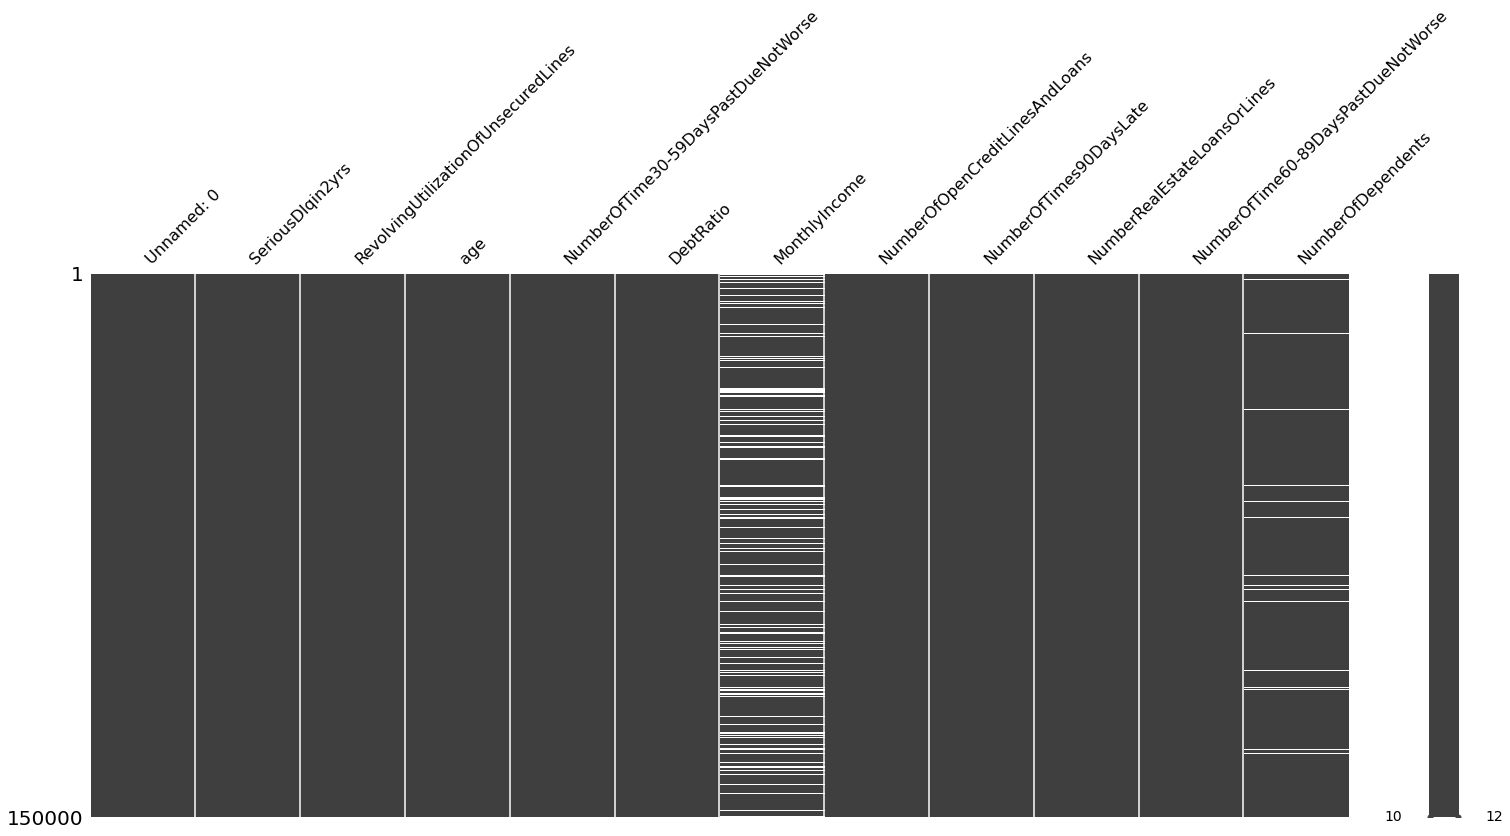

In [34]:
! pip install missingno
import pandas as pd
import missingno as msno
msno.matrix(df)

In [35]:
df1=df.fillna(df.median())

<AxesSubplot:>

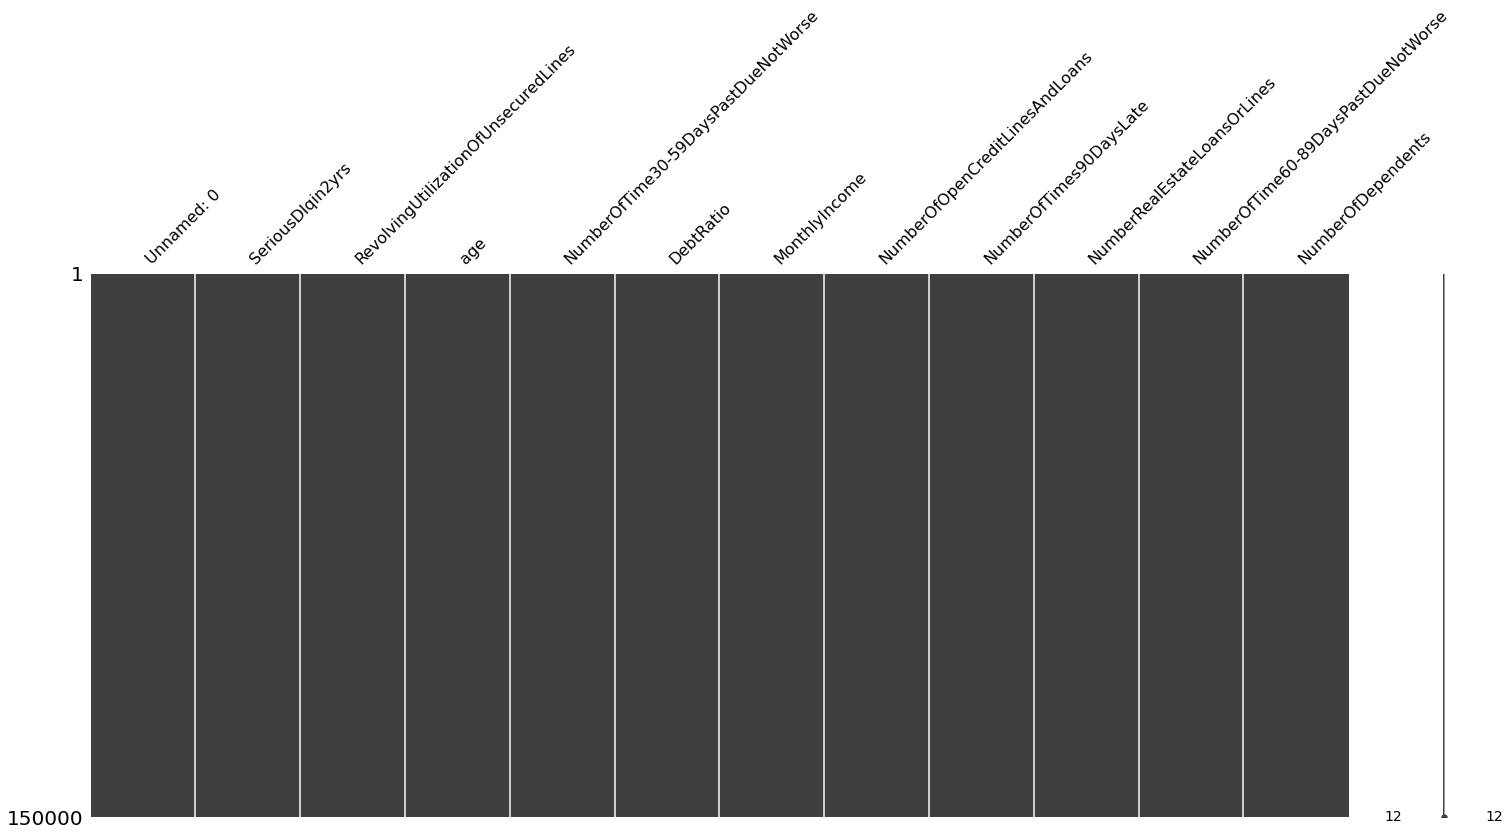

In [36]:
msno.matrix(df1)

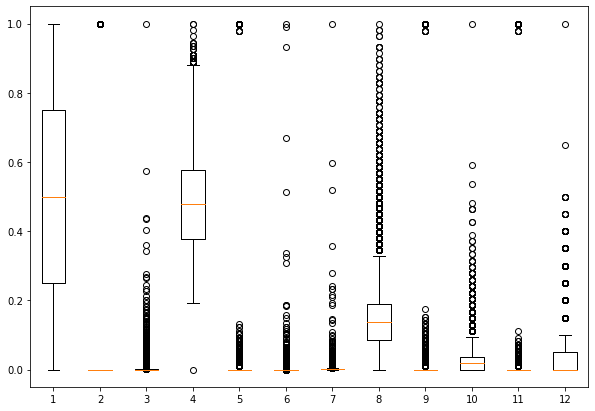

In [37]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df1)
plt.show()


In [38]:
## finding outliers
q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
IQR=q3-q1
outliers=df1[((df1<q1-1.5*IQR) | (df1>q3 +1.5*IQR))]

In [39]:
outliers.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,1.0,NaN,NaN,0.020408,NaN,NaN,NaN,NaN,0.111111,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.010204,NaN,NaN,NaN,0.010204,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.010204,NaN,0.021134,NaN,NaN,NaN,NaN,NaN


In [41]:
import numpy as np
import scipy.stats as stats
z1 = np.abs(stats.zscore(df1["RevolvingUtilizationOfUnsecuredLines"]))
z2 = np.abs(stats.zscore(df1["age"]))
z3 = np.abs(stats.zscore(df1["NumberOfTime30-59DaysPastDueNotWorse"]))
z4 = np.abs(stats.zscore(df1["DebtRatio"]))
z5 = np.abs(stats.zscore(df1["MonthlyIncome"]))
z6 = np.abs(stats.zscore(df1["NumberOfOpenCreditLinesAndLoans"]))
z7 = np.abs(stats.zscore(df1["NumberOfTimes90DaysLate"]))
z8 = np.abs(stats.zscore(df1["NumberRealEstateLoansOrLines"]))
z9 = np.abs(stats.zscore(df1["NumberOfTime60-89DaysPastDueNotWorse"]))
z10 = np.abs(stats.zscore(df1["NumberOfDependents"]))


In [42]:
data_clean = df1[(z1<3)&(z2<3)&(z3<3)&(z4<3)&(z5<3)&(z6<3)&(z7<3)&(z8<3)&(z9<3)&(z10<3)]


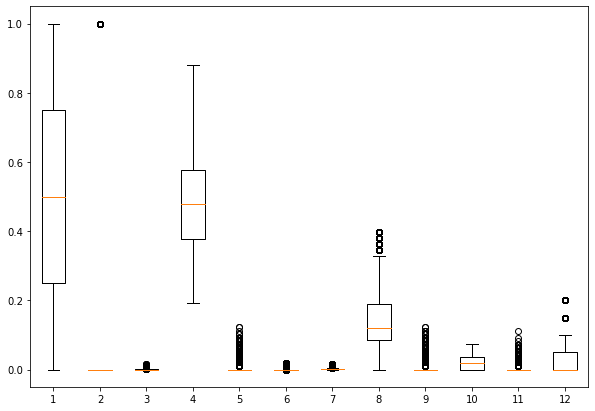

In [43]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data_clean)
plt.show()

In [44]:
z = np.abs(stats.zscore(df1))

data_clean1 = df1[(z<3).all(axis=1)]

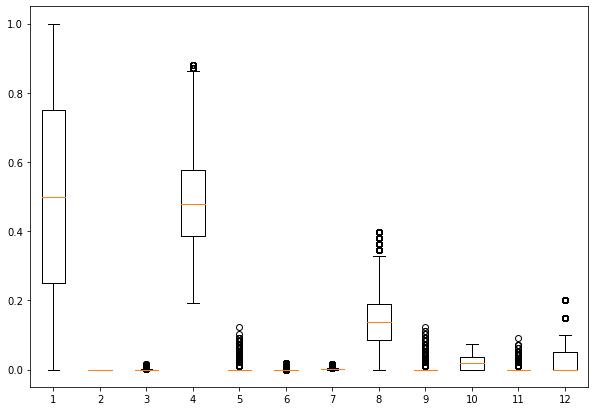

In [45]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data_clean1)
plt.show()

In [46]:
data_clean['SeriousDlqin2yrs'].value_counts()

0.0    135159
1.0      9396
Name: SeriousDlqin2yrs, dtype: int64

###  Downsamling

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

data_0 = data_clean[data_clean.SeriousDlqin2yrs==0]
data_1 =data_clean[data_clean.SeriousDlqin2yrs==1]
data_downsampling = resample(data_0, 
                                 replace=False,    
                                 n_samples=len(data_1))

datag = pd.concat([data_downsampling,data_1])
print(datag["SeriousDlqin2yrs"].value_counts())
 
    ## splitting data
x=datag.drop(['SeriousDlqin2yrs', 'Unnamed: 0'] , axis = 1)
y=datag.SeriousDlqin2yrs
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=200)
## on peut aussi faire upsamling : copie of the minority class

0.0    9396
1.0    9396
Name: SeriousDlqin2yrs, dtype: int64


In [80]:
## importing KNN model
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [81]:
## fitting model
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [82]:
##calcul des métriques de KNN
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse
##on a 37% d'erreur ce qui est elevé

0.34696829891340214

In [83]:
## ensuite on trouve les mailleurs prédicteurs en comparant la distribution càd les boxplots du groupe0 et groupe1 selon chaque colonne 

Text(0.5, 1.0, 'RevolvingUtilizationOfUnsecuredLines')

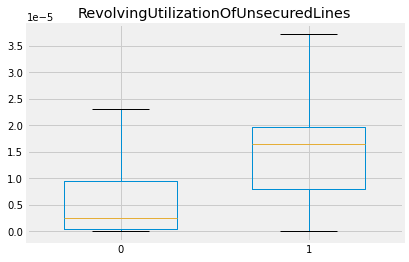

In [84]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = data_clean.groupby(data_clean.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='RevolvingUtilizationOfUnsecuredLines',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='RevolvingUtilizationOfUnsecuredLines',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('RevolvingUtilizationOfUnsecuredLines')


Text(0.5, 1.0, 'age')

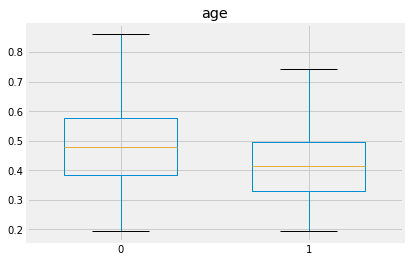

In [85]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = data_clean.groupby(data_clean.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='age',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='age',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('age')

Text(0.5, 1.0, 'NumberOfTime30-59DaysPastDueNotWorse')

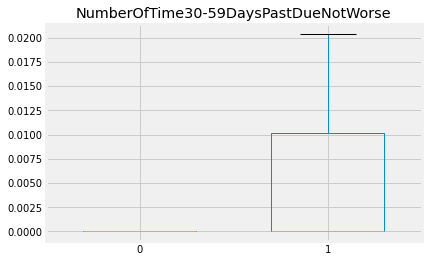

In [86]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = data_clean.groupby(data_clean.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='NumberOfTime30-59DaysPastDueNotWorse',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='NumberOfTime30-59DaysPastDueNotWorse',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('NumberOfTime30-59DaysPastDueNotWorse')

Text(0.5, 1.0, 'DebtRatio')

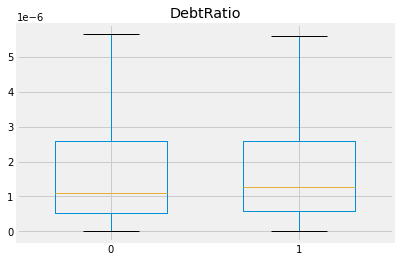

In [87]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = data_clean.groupby(data_clean.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='DebtRatio',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='DebtRatio',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('DebtRatio')

Text(0.5, 1.0, 'MonthlyIncome')

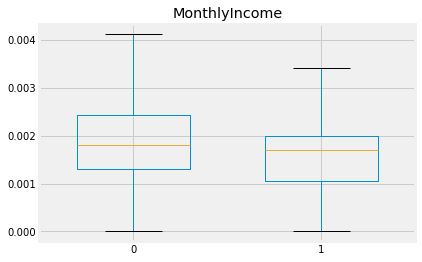

In [88]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = data_clean.groupby(data_clean.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='MonthlyIncome',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='MonthlyIncome',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('MonthlyIncome')

Text(0.5, 1.0, 'NumberOfOpenCreditLinesAndLoans')

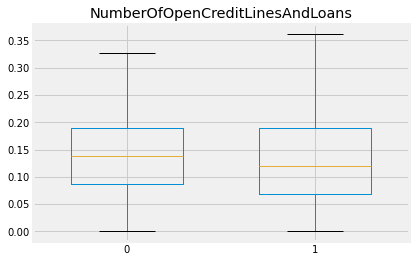

In [89]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = data_clean.groupby(data_clean.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='NumberOfOpenCreditLinesAndLoans',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='NumberOfOpenCreditLinesAndLoans',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('NumberOfOpenCreditLinesAndLoans')

Text(0.5, 1.0, 'NumberOfTimes90DaysLate')

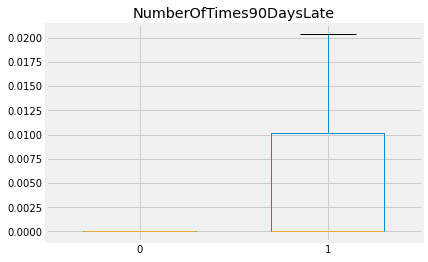

In [90]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = data_clean.groupby(data_clean.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='NumberOfTimes90DaysLate',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='NumberOfTimes90DaysLate',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('NumberOfTimes90DaysLate')

Text(0.5, 1.0, 'NumberRealEstateLoansOrLines')

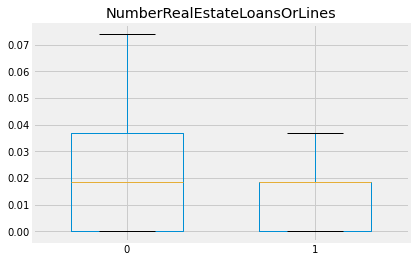

In [91]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = data_clean.groupby(data_clean.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='NumberRealEstateLoansOrLines',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='NumberRealEstateLoansOrLines',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('NumberRealEstateLoansOrLines')

Text(0.5, 1.0, 'NumberOfTime60-89DaysPastDueNotWorse')

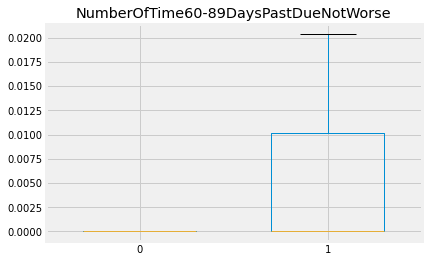

In [92]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = data_clean.groupby(data_clean.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='NumberOfTime60-89DaysPastDueNotWorse',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='NumberOfTime60-89DaysPastDueNotWorse',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('NumberOfTime60-89DaysPastDueNotWorse')

Text(0.5, 1.0, 'NumberOfDependents')

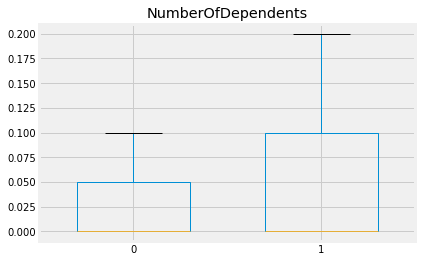

In [93]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = data_clean.groupby(data_clean.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='NumberOfDependents',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='NumberOfDependents',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('NumberOfDependents')

In [94]:
data_clean.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.000007,0.0,0.000019,0.366972,0.000000,3.696982e-07,0.000864,0.068966,0.000000,0.000000,0.0,0.05
2,0.000013,0.0,0.000013,0.348624,0.010204,2.581822e-07,0.001011,0.034483,0.010204,0.000000,0.0,0.00
3,0.000020,0.0,0.000005,0.275229,0.000000,1.093528e-07,0.001097,0.086207,0.000000,0.000000,0.0,0.00
5,0.000033,0.0,0.000004,0.678899,0.000000,1.139363e-06,0.001163,0.051724,0.000000,0.018519,0.0,0.05
6,0.000040,0.0,0.000006,0.522936,0.000000,1.732067e-02,0.001795,0.137931,0.000000,0.055556,0.0,0.00


In [95]:
 ## splitting data
x=datag.drop('SeriousDlqin2yrs' , axis = 1)
y=datag.SeriousDlqin2yrs
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=200)

#we import algorithme from sklearn
from sklearn.ensemble import RandomForestRegressor
#we create a Random Forest of 100 trees 
rf = RandomForestRegressor(n_estimators = 100, random_state = 200)

rf.fit(x_train, y_train)


RandomForestRegressor(random_state=200)

In [96]:

predictions = rf.predict(x_test)
predictions

array([0.82, 0.47, 0.27, ..., 0.97, 1.  , 0.82])

In [98]:
# MAE 
erreurs = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 4))

Mean Absolute Error: 0.3015


In [99]:
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Mean Absolute Percentage Error : inf %.


In [100]:
#we conserve variables names 
liste_variables = list(datag.columns)
liste_variables

['Unnamed: 0',
 'SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

Text(0.5, 0, 'Relative Importance')

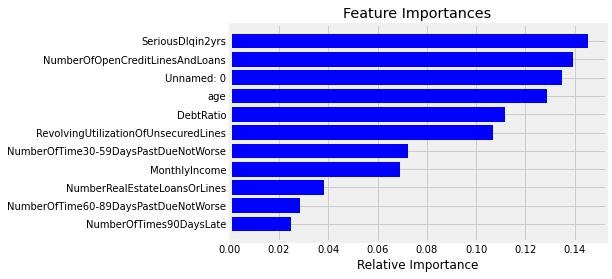

In [101]:
importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')